In [90]:
import pandas as pd

In [91]:
data=pd.read_csv('/content/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [92]:
!pip install pycaret

In [93]:
import pycaret
from pycaret.classification import *

# Setup Fn.
* PyCaret has two set of API's that you can work with. (1) Functional
* Setup fn. initialize the training env. & creates transformation pipeline,
* Session id:--> A random number for later reproducibility
* Target type: Binary, Multiclass, or Regression.

In [94]:
# PyCaret has two set of API's that you can work with. (1) Functional
# Setup fn. initialize the training env. & creates transformation pipeline,
# Session id:--> A random number for later reproducibility
# Target type: Binary, Multiclass, or Regression.

In [95]:
s=setup(data=data,target='Dataset',session_id=1)

,Description,Value
0,Session id,1
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(583, 11)"
5,Transformed data shape,"(583, 11)"
6,Transformed train set shape,"(408, 11)"
7,Transformed test set shape,"(175, 11)"
8,Numeric features,9
9,Categorical features,1


# Compare Models
* Trains and evaluates the performance of all the estimators available in the Pycaret library using cross-validation.
* The output of this fn. is avg. cross validation scores for the performance metrics.
* Custom metrics can be added or removed using add_metric and remove_metric function.

In [96]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7474,0.0000,0.7474,0.7323,0.7291,0.3114,0.3276,0.2120
rf,Random Forest Classifier,0.7446,0.0000,0.7446,0.7296,0.7282,0.3107,0.3230,0.4120
lightgbm,Light Gradient Boosting Machine,0.7352,0.0000,0.7352,0.7261,0.7232,0.3067,0.3173,0.4620
xgboost,Extreme Gradient Boosting,0.7276,0.0000,0.7276,0.7138,0.7155,0.2848,0.2912,0.1140
ada,Ada Boost Classifier,0.7253,0.0000,0.7253,0.7122,0.7156,0.2873,0.2910,0.1740
gbc,Gradient Boosting Classifier,0.7251,0.0000,0.7251,0.7145,0.7157,0.2915,0.2962,0.2580
dummy,Dummy Classifier,0.7133,0.0000,0.7133,0.5089,0.5940,0.0000,0.0000,0.0680
lr,Logistic Regression,0.7107,0.0000,0.7107,0.6765,0.6816,0.1874,0.1970,0.4650
ridge,Ridge Classifier,0.7059,0.0000,0.7059,0.6106,0.6163,0.0339,0.0549,0.2050
lda,Linear Discriminant Analysis,0.6962,0.0000,0.6962,0.6077,0.6166,0.0275,0.0400,0.1260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Reasons for AUC coming out as Zero
Reason1:
* Check for Imbalanced Classes & handle it using RandomOverSampler & run compare models fn. again

In [97]:
data.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [98]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [99]:
X.shape

(583, 10)

In [100]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [101]:
from imblearn.over_sampling import RandomOverSampler

In [102]:
ros=RandomOverSampler(random_state=42)
data_resampled=ros.fit_resample(X,y)

In [103]:
data_new=pd.concat([data_resampled[0],data_resampled[1]],axis=1)

In [104]:
data_new

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
827,56,Male,1.0,0.3,195,22,28,5.8,2.6,0.80,2
828,22,Male,2.7,1.0,160,82,127,5.5,3.1,1.20,2
829,65,Male,1.4,0.6,260,28,24,5.2,2.2,0.70,2
830,62,Male,0.7,0.2,173,46,47,7.3,4.1,1.20,2


In [105]:
data_new.Dataset.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

In [106]:
setup(data=data_new,target='Dataset',session_id=99)

,Description,Value
0,Session id,99
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(832, 11)"
5,Transformed data shape,"(832, 11)"
6,Transformed train set shape,"(582, 11)"
7,Transformed test set shape,"(250, 11)"
8,Numeric features,9
9,Categorical features,1


In [107]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8349,0.0000,0.8349,0.8370,0.8346,0.6697,0.6719,0.3160
rf,Random Forest Classifier,0.8143,0.0000,0.8143,0.8246,0.8127,0.6285,0.6386,0.3620
lightgbm,Light Gradient Boosting Machine,0.8091,0.0000,0.8091,0.8179,0.8079,0.6184,0.6270,0.8230
xgboost,Extreme Gradient Boosting,0.7971,0.0000,0.7971,0.8051,0.7958,0.5943,0.6021,0.1280
dt,Decision Tree Classifier,0.7870,0.0000,0.7870,0.7945,0.7856,0.5740,0.5814,0.0800
gbc,Gradient Boosting Classifier,0.7851,0.0000,0.7851,0.7950,0.7832,0.5702,0.5799,0.2350
ada,Ada Boost Classifier,0.7387,0.0000,0.7387,0.7489,0.7359,0.4775,0.4873,0.1690
lr,Logistic Regression,0.7318,0.0000,0.7318,0.7523,0.7251,0.4636,0.4832,0.2090
lda,Linear Discriminant Analysis,0.7079,0.0000,0.7079,0.7380,0.6983,0.4156,0.4443,0.0710
ridge,Ridge Classifier,0.7045,0.0000,0.7045,0.7320,0.6954,0.4087,0.4351,0.1110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [108]:
et=best_model
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=99, verbose=0,
                     warm_start=False)

# Analyze Model
* We can use plot_model() fn. to analyze the performance of the trained model on the test set

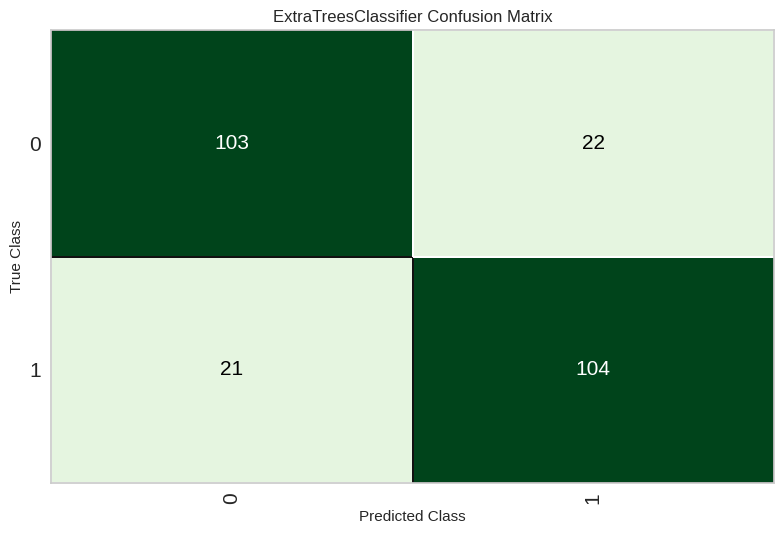

In [109]:
# plot confusion matrix
plot_model(et,plot='confusion_matrix')

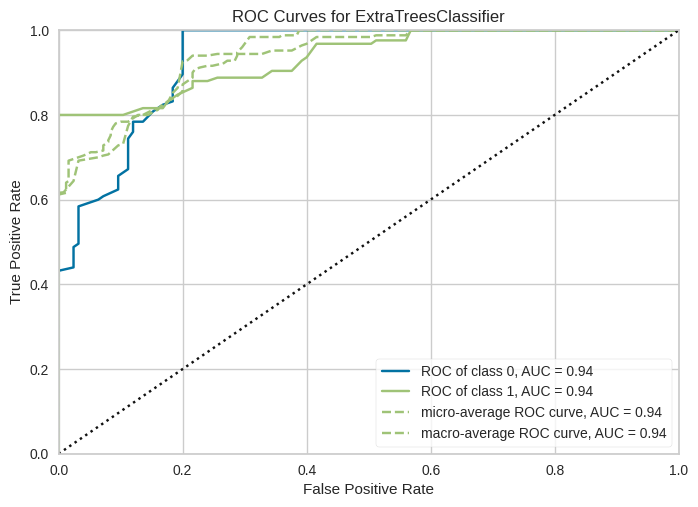

In [110]:
# plot AUC
plot_model(et,plot='auc')

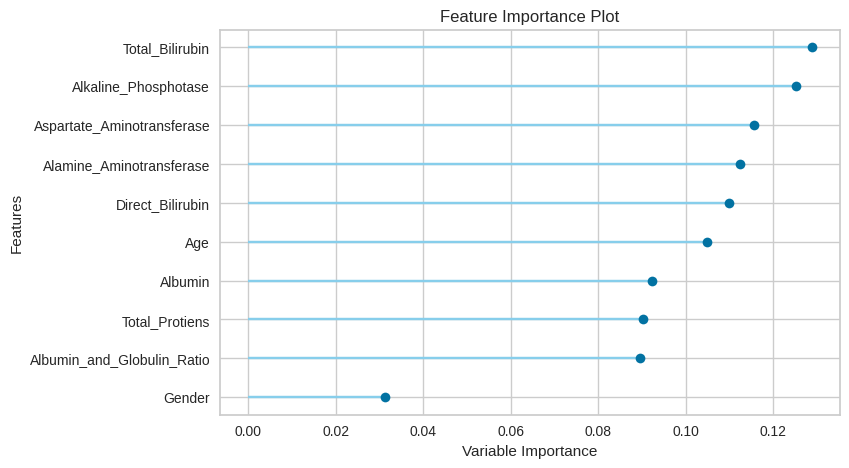

In [111]:
# plot feature importance
plot_model(et,plot='feature')

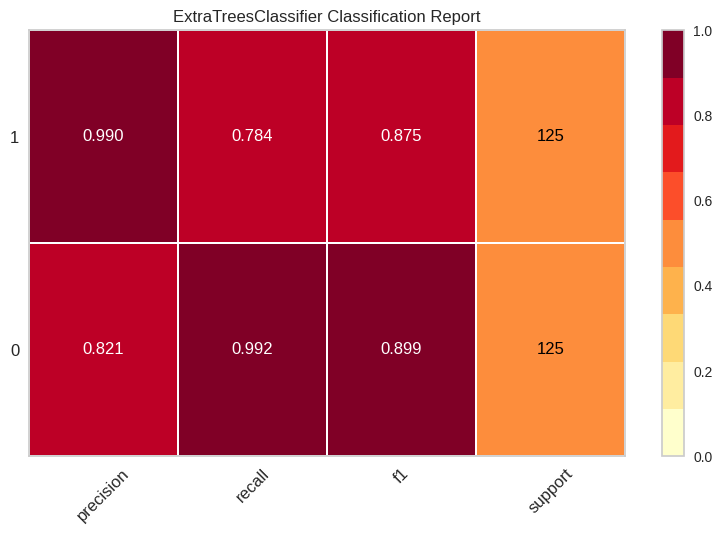

In [112]:
plot_model(best,plot='class_report')

# Prediction
* The predict_model function returns prediction_label and prediction_score (probability of the predicted class) as new columns in dataframe.


In [113]:
# predict on test set
holdout_pred=predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8280,0.9353,0.8280,0.8280,0.8280,0.6560,0.6560


In [114]:
# show predictions df
holdout_pred

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,prediction_label,prediction_score
478,33,Male,7.1,3.7,196,622,497,6.9,3.6,1.09,1,1,0.99
419,55,Female,8.2,3.9,1350,52,65,6.7,2.9,0.70,1,1,0.94
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2,2,1.00
698,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2,2,1.00
741,21,Male,0.8,0.2,183,33,57,6.8,3.5,1.00,2,2,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,42,Male,0.8,0.2,114,21,23,7.0,3.0,0.70,2,2,1.00
213,8,Female,0.9,0.2,401,25,58,7.5,3.4,0.80,1,1,0.81
397,78,Male,1.0,0.3,152,28,70,6.3,3.1,0.90,1,1,0.70
563,64,Male,1.4,0.5,298,31,83,7.2,2.6,0.50,1,1,0.90


In [115]:
et_model=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8475,0.0000,0.8475,0.8479,0.8475,0.6950,0.6954
1,0.9322,0.0000,0.9322,0.9322,0.9322,0.8644,0.8644
2,0.8448,0.0000,0.8448,0.8486,0.8444,0.6897,0.6934
3,0.8103,0.0000,0.8103,0.8107,0.8103,0.6207,0.6211
4,0.7759,0.0000,0.7759,0.7762,0.7758,0.5517,0.5521
5,0.8448,0.0000,0.8448,0.8452,0.8448,0.6897,0.6901
6,0.8793,0.0000,0.8793,0.8798,0.8793,0.7586,0.7591
7,0.8621,0.0000,0.8621,0.8691,0.8614,0.7241,0.7311
8,0.7759,0.0000,0.7759,0.7762,0.7758,0.5517,0.5521


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [116]:
tune_et=tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7627,0.0000,0.7627,0.7671,0.7613,0.5242,0.5291
1,0.8644,0.0000,0.8644,0.8937,0.8622,0.7300,0.7581
2,0.6897,0.0000,0.6897,0.7288,0.6758,0.3793,0.4167
3,0.7414,0.0000,0.7414,0.7671,0.7350,0.4828,0.5078
4,0.7414,0.0000,0.7414,0.7671,0.7350,0.4828,0.5078
5,0.7069,0.0000,0.7069,0.7132,0.7047,0.4138,0.4201
6,0.7414,0.0000,0.7414,0.8021,0.7277,0.4828,0.5401
7,0.7931,0.0000,0.7931,0.8062,0.7909,0.5862,0.5992
8,0.7241,0.0000,0.7241,0.7426,0.7188,0.4483,0.4664


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Save Model
* Using pycaret's save_model() fn. we can save the entire pipeline

In [146]:
save_model(et,'ETC_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransferase',
                                              'Aspartate_Aminotransferase',
                                              'Total_Protiens', '...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                              

# Load the saved model

In [147]:
load_best_pipeline=load_model('ETC_model')
load_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Total_Bilirubin',
                                             'Direct_Bilirubin',
                                             'Alkaline_Phosphotase',
                                             'Alamine_Aminotransferase',
                                             'Aspartate_Aminotransferase',
                                             'Total_...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=99, verbose=0,
                                      warm_start=False))],
         verbose=False)

# Perform the manual way of model building using the system suggested algorithm(ExtraTreeClassifier)

In [132]:
data_new.shape

(832, 11)

In [117]:
data_new.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

In [118]:
data_new['Albumin_and_Globulin_Ratio']=data_new['Albumin_and_Globulin_Ratio'].fillna(data_new['Albumin_and_Globulin_Ratio'].median())

In [119]:
data_new.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [120]:
data_new['Gender']=data_new['Gender'].astype('category')
data_new['Gender']=data_new['Gender'].cat.codes

In [121]:
X=data_new.iloc[:,:-1]
y=data_new.iloc[:,-1]

In [134]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [135]:
from sklearn.ensemble import ExtraTreesClassifier

In [136]:
et_classifier=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=99, verbose=0,
                     warm_start=False)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [138]:
et_classifier.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=99, verbose=0,
                     warm_start=False)

In [139]:
y_train_pred=et_classifier.predict(X_train)
y_test_pred=et_classifier.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.9523809523809523


In [142]:
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[376   0]
 [  0 372]]
[[38  2]
 [ 2 42]]


In [143]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       376
           2       1.00      1.00      1.00       372

    accuracy                           1.00       748
   macro avg       1.00      1.00      1.00       748
weighted avg       1.00      1.00      1.00       748

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        40
           2       0.95      0.95      0.95        44

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84

